<a id='part1'></a>
## 1. La Data

In [1]:
import pandas

linkAdjMx='dataFigueroa.csv'

EdgesAsDF = pandas.read_csv(linkAdjMx, index_col=0) 

In [2]:
varsToDrop=['multinational']
adjacency=EdgesAsDF.drop(varsToDrop,axis=1) 

#resultado
adjacency

,Romero,Grana,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodriguez,Custer,Ikeda,Cogorno,Arias Davila
Names,,,,,,,,,,,,,,,,,,,,,
Romero,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Grana,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Usando **networkx**:

In [3]:
import networkx as net

EliteNet = net.Graph(adjacency) 

In [4]:
# nodos:
len(EliteNet)

37

In [5]:
# enlaces:
EliteNet.size()

135

Grafica

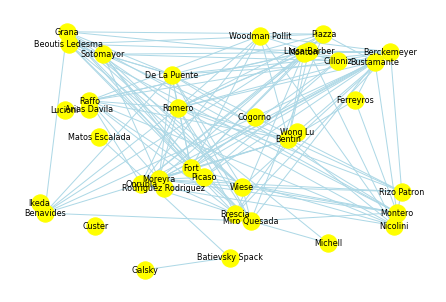

In [6]:
%matplotlib inline

net.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Añadimos los atributos:

In [7]:
EdgesAsDF['multinational'].head()

Names
Romero          1
Grana           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: multinational, dtype: int64

Asi está aún:

In [8]:
EliteNet.nodes(data=True)

NodeDataView({'Romero': {}, 'Grana': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodriguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

Networkx tiene la función **set_node_attributes** pero necesita un **mapping** en formato dict:

In [9]:
dict(zip(EdgesAsDF.index,EdgesAsDF['multinational']))

{'Romero': 1,
 'Grana': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodriguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

Asi:

In [10]:
attributeToAdd=dict(zip(EdgesAsDF.index,EdgesAsDF['multinational']))

Cambiamos:

In [11]:
net.set_node_attributes(EliteNet, attributeToAdd,'multi')

Ahora:

In [52]:
EliteNet.nodes(data=True)

NodeDataView({'Romero': {'multi': 1}, 'Grana': {'multi': 1}, 'Miro Quesada': {'multi': 1}, 'Moreyra': {'multi': 1}, 'Fort': {'multi': 1}, 'De La Puente': {'multi': 1}, 'Wiese': {'multi': 1}, 'Onrubia': {'multi': 1}, 'Brescia': {'multi': 1}, 'Nicolini': {'multi': 1}, 'Montero': {'multi': 1}, 'Picaso': {'multi': 1}, 'Bentin': {'multi': 1}, 'Benavides': {'multi': 1}, 'Bustamante': {'multi': 1}, 'Woodman Pollit': {'multi': 1}, 'Raffo': {'multi': 1}, 'Piazza': {'multi': 1}, 'Berckemeyer': {'multi': 0}, 'Llosa Barber': {'multi': 1}, 'Beoutis Ledesma': {'multi': 1}, 'Rizo Patron': {'multi': 1}, 'Montori': {'multi': 1}, 'Sotomayor': {'multi': 1}, 'Cilloniz': {'multi': 1}, 'Ferreyros': {'multi': 0}, 'Michell': {'multi': 0}, 'Wong Lu': {'multi': 1}, 'Batievsky Spack': {'multi': 1}, 'Matos Escalada': {'multi': 1}, 'Galsky': {'multi': 0}, 'Lucioni': {'multi': 0}, 'Rodriguez Rodriguez': {'multi': 1}, 'Custer': {'multi': 0}, 'Ikeda': {'multi': 0}, 'Cogorno': {'multi': 0}, 'Arias Davila': {'multi': 1

Esta red estará "conectada"?

In [13]:
net.is_connected(EliteNet)

False

Cuantos "componentes"?

In [14]:
numComponents=net.number_connected_components(EliteNet)
numComponents

8

In [65]:
components = net.connected_components(EliteNet)
comp_dict = {idx: comp for idx, comp in enumerate(components)}
attr = {n: comp_id for comp_id, nodes in comp_dict.items() for n in nodes}
attr

{'Miro Quesada': 0,
 'Bustamante': 0,
 'Wong Lu': 0,
 'Woodman Pollit': 0,
 'Benavides': 0,
 'Ferreyros': 0,
 'De La Puente': 0,
 'Rizo Patron': 0,
 'Sotomayor': 0,
 'Onrubia': 0,
 'Wiese': 0,
 'Llosa Barber': 0,
 'Beoutis Ledesma': 0,
 'Brescia': 0,
 'Berckemeyer': 0,
 'Michell': 0,
 'Montori': 0,
 'Piazza': 0,
 'Grana': 0,
 'Raffo': 0,
 'Bentin': 0,
 'Cilloniz': 0,
 'Romero': 0,
 'Moreyra': 0,
 'Picaso': 0,
 'Nicolini': 0,
 'Fort': 0,
 'Montero': 0,
 'Galsky': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Lucioni': 2,
 'Rodriguez Rodriguez': 3,
 'Custer': 4,
 'Ikeda': 5,
 'Cogorno': 6,
 'Arias Davila': 7}

In [67]:
net.set_node_attributes(EliteNet, attr,"component")
EliteNet.nodes(data=True)

NodeDataView({'Romero': {'multi': 1, 'component': 0}, 'Grana': {'multi': 1, 'component': 0}, 'Miro Quesada': {'multi': 1, 'component': 0}, 'Moreyra': {'multi': 1, 'component': 0}, 'Fort': {'multi': 1, 'component': 0}, 'De La Puente': {'multi': 1, 'component': 0}, 'Wiese': {'multi': 1, 'component': 0}, 'Onrubia': {'multi': 1, 'component': 0}, 'Brescia': {'multi': 1, 'component': 0}, 'Nicolini': {'multi': 1, 'component': 0}, 'Montero': {'multi': 1, 'component': 0}, 'Picaso': {'multi': 1, 'component': 0}, 'Bentin': {'multi': 1, 'component': 0}, 'Benavides': {'multi': 1, 'component': 0}, 'Bustamante': {'multi': 1, 'component': 0}, 'Woodman Pollit': {'multi': 1, 'component': 0}, 'Raffo': {'multi': 1, 'component': 0}, 'Piazza': {'multi': 1, 'component': 0}, 'Berckemeyer': {'multi': 0, 'component': 0}, 'Llosa Barber': {'multi': 1, 'component': 0}, 'Beoutis Ledesma': {'multi': 1, 'component': 0}, 'Rizo Patron': {'multi': 1, 'component': 0}, 'Montori': {'multi': 1, 'component': 0}, 'Sotomayor':

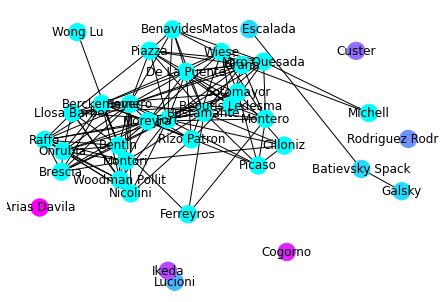

In [90]:
# coloreando
color_map = plt.get_cmap("cool")
nodesPositions=net.spring_layout(EliteNet,k=1)

valuesForColors=[n[1]['component'] for n in EliteNet.nodes(data=True)]
net.draw(EliteNet,nodesPositions,node_color=valuesForColors,cmap=color_map,with_labels=True)

El **Giant Component**:

In [92]:
Gcc = sorted(net.connected_components(EliteNet), key=len, reverse=True)
EliteNet_giant = EliteNet.subgraph(Gcc[0])

Gráficamente:

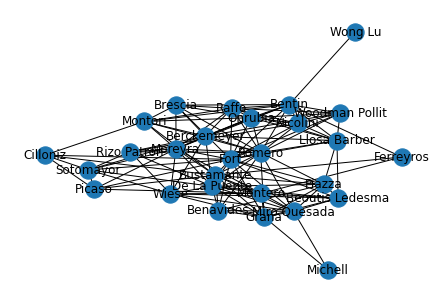

In [93]:
net.draw(EliteNet_giant,with_labels=True)

Resumen:

In [94]:
# enlaces:
EliteNet_giant.size()

133

In [95]:
# nodos:
len(EliteNet_giant)

28

____

<a id='part2'></a>

## 2. Exploración

<a id='part21'></a>

### Toda la red

* Density: 

In [96]:
net.density(EliteNet_giant) 

0.35185185185185186

In [97]:
net.diameter(EliteNet_giant)

4

* Local clustering coefficient:


In [99]:
# count_zeros=False compatible con R!
net.average_clustering(EliteNet_giant,count_zeros=False)

0.6537018696117423

In [100]:
net.average_shortest_path_length(EliteNet_giant)

1.7407407407407407

* Transitivity: 

In [101]:
net.transitivity(EliteNet_giant)

0.5829694323144105

* Assortativity (degree):

In [102]:
net.degree_assortativity_coefficient(EliteNet_giant)

-0.12086710760602014

Assortativity con algun atributo:

In [103]:
net.attribute_assortativity_coefficient(EliteNet_giant,'multi')

-0.07258064516129017

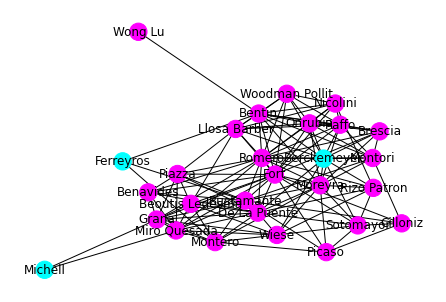

In [105]:
# coloreando por "multi"
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['multi'] for n in EliteNet_giant.nodes(data=True)]
net.draw(EliteNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True)

<a id='part22'></a>

### Exploración de comunidades

* Cuántos cliques?

In [106]:
len([a for a in net.enumerate_all_cliques(EliteNet_giant)])

1074

Cada clique:

In [113]:
for a in net.find_cliques(EliteNet_giant):
    print (a)

['Ferreyros', 'Bentin']
['Ferreyros', 'Montero', 'Bustamante']
['Montero', 'Picaso', 'Moreyra', 'Bustamante']
['Montero', 'De La Puente', 'Miro Quesada', 'Grana', 'Beoutis Ledesma', 'Wiese']
['Montero', 'De La Puente', 'Miro Quesada', 'Grana', 'Bustamante']
['Montero', 'De La Puente', 'Moreyra', 'Wiese']
['Montero', 'De La Puente', 'Moreyra', 'Bustamante']
['Berckemeyer', 'Wiese', 'Moreyra', 'De La Puente', 'Rizo Patron', 'Sotomayor']
['Berckemeyer', 'Romero', 'Bentin', 'Onrubia', 'Raffo', 'Brescia', 'Moreyra', 'Montori']
['Berckemeyer', 'Romero', 'Bentin', 'Onrubia', 'Raffo', 'Woodman Pollit', 'Llosa Barber']
['Berckemeyer', 'Romero', 'De La Puente', 'Moreyra', 'Rizo Patron']
['Rizo Patron', 'Nicolini', 'Romero']
['Michell', 'Miro Quesada', 'Grana']
['Montori', 'Cilloniz', 'Bustamante']
['Montori', 'Romero', 'Moreyra', 'Bustamante']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Miro Quesada', 'De La Puente', 'Grana']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Llosa Barber']
['Fort', 'Cilloniz', 

* Cuántos "cliques máximos"?

In [112]:
net.graph_number_of_cliques(EliteNet_giant)

28

Tamaño del máximo clique:

In [115]:
net.graph_clique_number(EliteNet_giant)

8

Cada maximo clique

In [116]:
[c for c in net.find_cliques(EliteNet_giant) if len(c) == net.graph_clique_number(EliteNet_giant)]

[['Berckemeyer',
  'Romero',
  'Bentin',
  'Onrubia',
  'Raffo',
  'Brescia',
  'Moreyra',
  'Montori'],
 ['Fort',
  'Romero',
  'Bentin',
  'Onrubia',
  'Raffo',
  'Nicolini',
  'Woodman Pollit',
  'Llosa Barber'],
 ['Fort',
  'Romero',
  'Miro Quesada',
  'De La Puente',
  'Piazza',
  'Grana',
  'Bustamante',
  'Benavides']]

El [_método Louvain_](https://perso.uclouvain.be/vincent.blondel/research/louvain.html) para detectar comunidades (**pip install python-louvain**, e importar usando **community**).


In [117]:
import community 
parts = community.best_partition(EliteNet_giant)
parts

{'Romero': 1,
 'Grana': 2,
 'Miro Quesada': 2,
 'Moreyra': 0,
 'Fort': 0,
 'De La Puente': 2,
 'Wiese': 2,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 2,
 'Picaso': 0,
 'Bentin': 1,
 'Benavides': 2,
 'Bustamante': 2,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 2,
 'Berckemeyer': 1,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 2,
 'Rizo Patron': 0,
 'Montori': 1,
 'Sotomayor': 0,
 'Cilloniz': 0,
 'Ferreyros': 2,
 'Michell': 2,
 'Wong Lu': 1}

Añadiendo atributo:

In [118]:
net.set_node_attributes(EliteNet_giant, parts,'community')

Graficando:

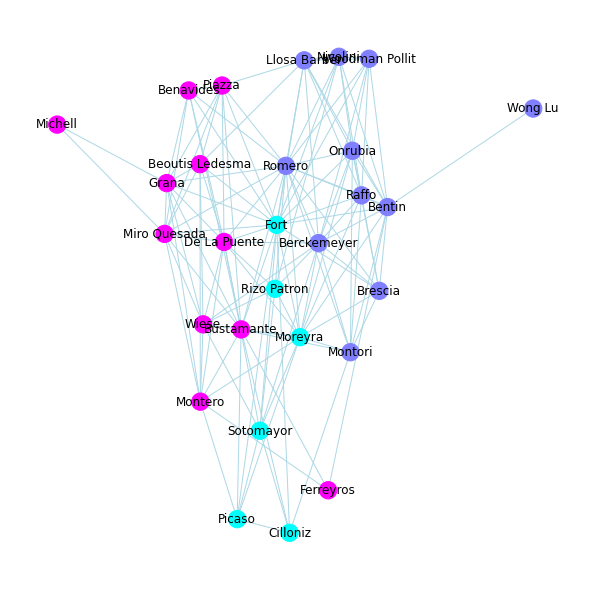

In [119]:
pos=net.spring_layout(EliteNet_giant, k=0.2) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['community'] for n in EliteNet_giant.nodes(data=True)]
net.draw(EliteNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue')